# ME 7160 Project


### Solution to ODE via FFT method:

#### Following linear equation was solved as a verification of the method

**$\ddot{x} + x = cos(2t)$**

Since method of harmonic balance is valid for steady state response the particular solution to the above problem was also plotted to compare with the numerical results:

**$X_p = -\frac{1}{3}cos(2t)$**

         Current function value: 0.000013
         Iterations: 55
         Function evaluations: 4449
         Gradient evaluations: 87
Values of x after optimization:
[-0.33385345 -0.32294905 -0.29095463 -0.23996304 -0.17330998 -0.09535488
 -0.01119682  0.07365944  0.15366362  0.22358261  0.27884304  0.3158305
  0.33212549  0.32666178  0.29979686  0.25328746  0.19017601  0.11459056
  0.03147524 -0.0537333  -0.13546163 -0.20836383 -0.26767116 -0.30950457
 -0.33112726 -0.33112531 -0.3094988  -0.26766262 -0.20835318 -0.13545007
 -0.05372149  0.03148644  0.11460036  0.19018384  0.25329303  0.29980014
  0.32666315  0.33212465  0.31582742  0.27883726  0.22357378  0.15365184
  0.07364492 -0.01121318 -0.095372   -0.17332648 -0.23997732 -0.29096507
 -0.32295464]


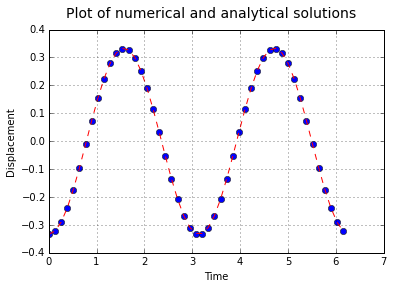

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 50 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

x0=np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.0000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    res = xddot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot(t, sol.x, 'bo') #FFT solution plot
plt.plot(t, -(1/3)*np.cos(2*t), 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')

plt.grid()
plt.show()

### Results from the optimization above can be used to approximate a fitted function that can be used as desired. Assume the following solution:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + A_3cos(3\omega t + 3\beta)$

#### Here coefficients $A_o$, $A_1$, $A_2$, $A_3$, $\omega$, $\beta$ are the unknowns and will be solved for using least square fitting

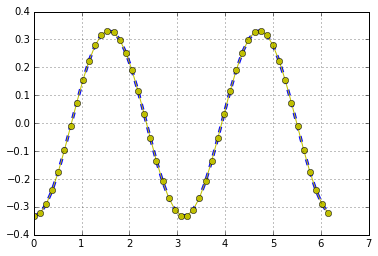

Coefficient values listed below
[ -5.25257140e-04  -8.90158062e-07   3.33334533e-01   8.18288552e-07
   9.99996722e-01   1.57081696e+00]


In [7]:
#Define function to be called in the "leastsq" function
def errorFun(p, t):
    A0, A1, A2, A3, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta) + A3*np.cos(3*omega*t + 3*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[4]*t + p[5]) + p[2]*np.cos(2*p[4]*t + 2*p[5]) + p[3]*np.cos(3*p[4]*t + 3*p[5])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, peval(t, plsq[0]), 'b--', linewidth = 3)
plt.plot(t, sol.x, 'y-o')

plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

### From the least square approach it is evident that $A_1$ and $A_3$ pretty much zero. Therefore solution for $x$ takes form seen below.

### Here $\omega = 1$ and $\beta = 1.57$

In [8]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 2))
A1=sp.nsimplify(round(coeff[1], 2))
A2=sp.nsimplify(round(coeff[2], 2))
A3=sp.nsimplify(round(coeff[3], 2))
omega=sp.nsimplify(round(coeff[4], 2))
beta=sp.nsimplify(round(coeff[5], 2))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta) + A3*sp.cos(3*omega*time + 3*beta)
ans

      ⎛      157⎞
33⋅cos⎜2⋅t + ───⎟
      ⎝       50⎠
─────────────────
       100       